In [4]:
pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]'

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'google-cloud-bigquery[bqstorage,pandas]'"


In [5]:
pip install web3

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: aiohttp<4,>=3.7.4.post0 in c:\users\abhis\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (from web3) (3.8.1)



In [6]:
from web3 import Web3, EthereumTesterProvider

In [7]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install matplotlib

In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

In [11]:
#importing the needed libraries
import datetime, calendar
from decimal import Decimal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Exportation of data

In [12]:
df = pd.read_csv('sixteen-k-rows.csv')
df

,address,eth_balance
0,0x00000000219ab540356cbb839cbe05303d7705fa,1.002810e+25
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.101470e+24
2,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,2.113030e+24
3,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1.996010e+24
4,0x73bceb1cd57c711feac4224d062b0f6ff338501e,1.993500e+24
...,...,...
15995,0x5cdb405484b37006ef66fb339c89f1e789e5dfb0,3.285840e+20
15996,0x0eeeb243e1122a8f39ab3f96fde43d36bf4f9a14,3.284810e+20
15997,0x86c06f627e9282fc75196c6aff900bedbcd1e4e4,3.284680e+20
15998,0xdb0e89a9b003a28a4055ef772e345e8089987bfd,3.284550e+20


To perform inital exploration of the transactions dataframe created, we dig deep using describe to gain more knowledge

In [13]:
df.describe()

,eth_balance
count,1.600000e+04
mean,6.298282e+21
std,1.045540e+23
min,3.284010e+20
25%,4.840143e+20
50%,8.000000e+20
75%,1.899113e+21
max,1.002810e+25


Feature selection

In [24]:
#to perform a comparsion with the highest ether values that are present in the transaction wallet
# we need to know the lowest ether balance that is prsent in a wallet.
low_bal_wallet = df.iloc[-1]
#lowest balance
lowestbalance = low_bal_wallet.eth_balance
#ether balances are measured in wei
print(f"Wallet containing the lowest balance {lowestbalance} wei")
#print(f" {type(lowestbalance)=}")

Wallet containing the lowest balance 3.28401e+20 wei


In [26]:
def weiNumpy_to_weiInt(wei_numpy):
    wei_int = int(wei_numpy)
    return wei_int

In [27]:
df["wei_int"] = df.eth_balance.apply(weiNumpy_to_weiInt)
df.head()

,address,eth_balance,wei_int,ether
0,0x00000000219ab540356cbb839cbe05303d7705fa,1.002810e+25,10028099999999999889899520,10028099.99999999988989952
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,7.101470e+24,7101469999999999769837568,7101469.999999999769837568
2,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,2.113030e+24,2113029999999999927123968,2113029.999999999927123968
3,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,1.996010e+24,1996009999999999976407040,1996009.99999999997640704
4,0x73bceb1cd57c711feac4224d062b0f6ff338501e,1.993500e+24,1993500000000000084934656,1993500.000000000084934656


In [28]:
df.wei_int.describe()

count                      16000
unique                     13805
top       1000000000000000000000
freq                         215
Name: wei_int, dtype: object

In [31]:
# Calculating ether of the top balance ether wallet
high_bal_wallet = df.wei_int.iloc[0]
max_ether_bal = Web3.fromWei(high_bal_wallet, 'ether')
print(f"{max_ether_bal=}")
#ether balance is now present in decimal 
#print(f"{type(max_ether_balance)=}")

max_ether_bal=Decimal('10028099.99999999988989952')


Data Transformation

In [20]:
wei_int_to_eth_dec = lambda wei_int : Web3.fromWei(wei_int, 'ether')
#creating the ether column
df['ether'] = df.wei_int.apply(wei_int_to_eth_dec)

C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution plot of the Top 16,000 Ethereum wallets (bins=50)'}, xlabel='ether', ylabel='Relative percentage'>

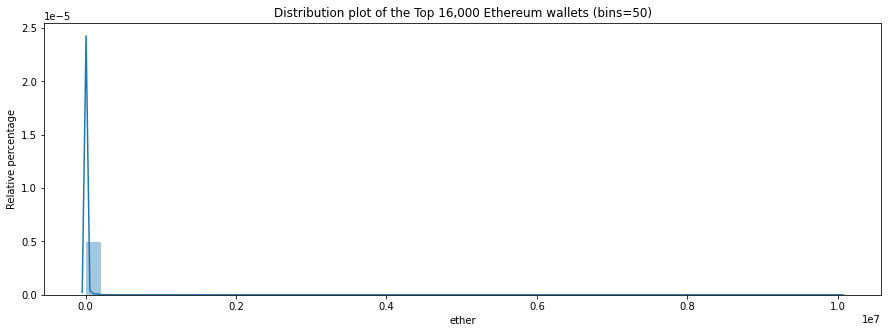

In [44]:
# Using seaborn to visualize the top and bottom most wallet comparision
bins=50
x,a = plt.subplots(figsize=(15,5))
a.set_title(f'Distribution plot of the Top 16,000 Ethereum wallets ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether, ax=a, bins=bins)

C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution plot of the Top 16.000 Ethereum wallets (bins=15)'}, xlabel='ether', ylabel='Relative percentage'>

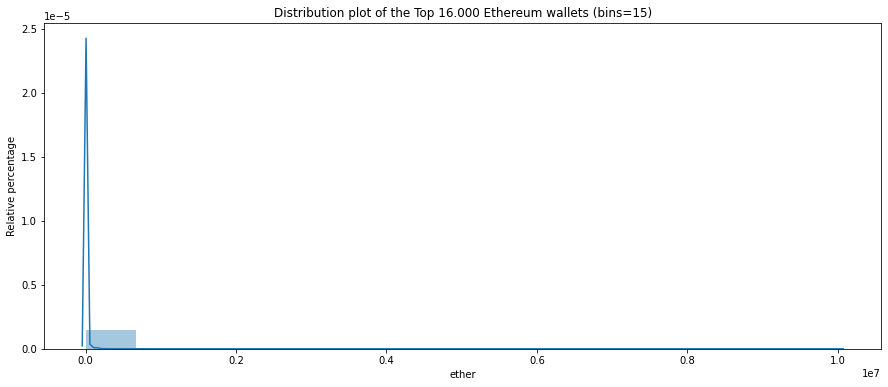

In [45]:
#Above graph is unclear due to which changing the bin size
bins = 15
x,a = plt.subplots(figsize=(15,6))
a.set_title(f'Distribution plot of the Top 16.000 Ethereum wallets ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether, ax=a, bins=bins)

<AxesSubplot:title={'center':'Top No: 16000 to top No: 1000 - Ethereum Wallets) (bins=50)'}, xlabel='ether', ylabel='Relative-Percentage'>

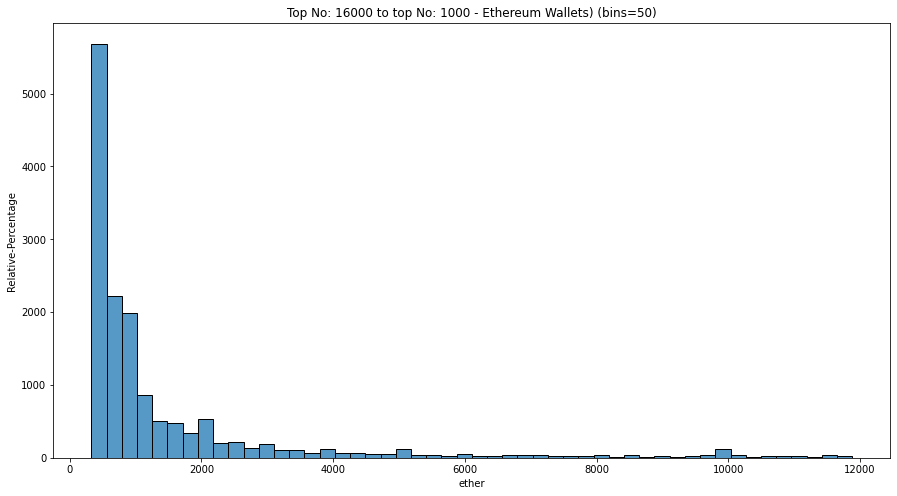

In [46]:
bins = 50
f,a = plt.subplots(figsize=(15,8))
a.set_title(f'Top No: 16000 to top No: 1000 - Ethereum Wallets) ({bins=})')
a.set_ylabel('Relative-Percentage')
a.set_xlabel('ether')
sns.histplot(df.ether.iloc[-15000:], ax=a, bins=bins)

It is understood that there are less than 200 wallets with more than 10000 ether 

The analysis only provides for the 16K eth-transactions that took place.
To comprehend the computing power of big query.
A single query can be tuned to provide the same results but to the whole Web3 ETH chain, in this case which was about 11.9 GB